In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [6]:
path = untar_data('https://s3.amazonaws.com/fast-ai-imageclas/cifar10')
path

PosixPath('/root/.fastai/data/cifar10')

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/test')]

In [0]:
path_test = path/'test'
path_train = path/'train'

In [0]:
fnames = get_image_files(path_test)

In [0]:
??ImageDataBunch.from_folder

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid_pct = 0.2, test='test', size=224, num_workers = 0)

In [13]:
data.normalize(imagenet_stats)

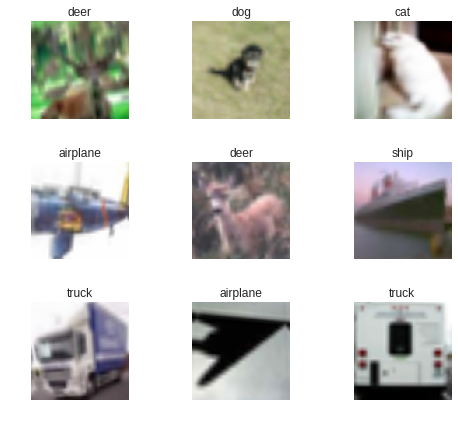

In [16]:
data.show_batch(rows = 3, figsize = (7,6))

In [17]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

In [18]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 83651827.72it/s]


In [19]:
learn.fit_one_cycle(4)

Total time: 1:04:04
epoch  train_loss  valid_loss  error_rate
1      0.338958    0.221924    0.078887    (16:09)
2      0.235914    0.156264    0.050770    (15:58)
3      0.199173    0.122823    0.044411    (16:05)
4      0.138079    0.114017    0.040040    (15:50)



In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

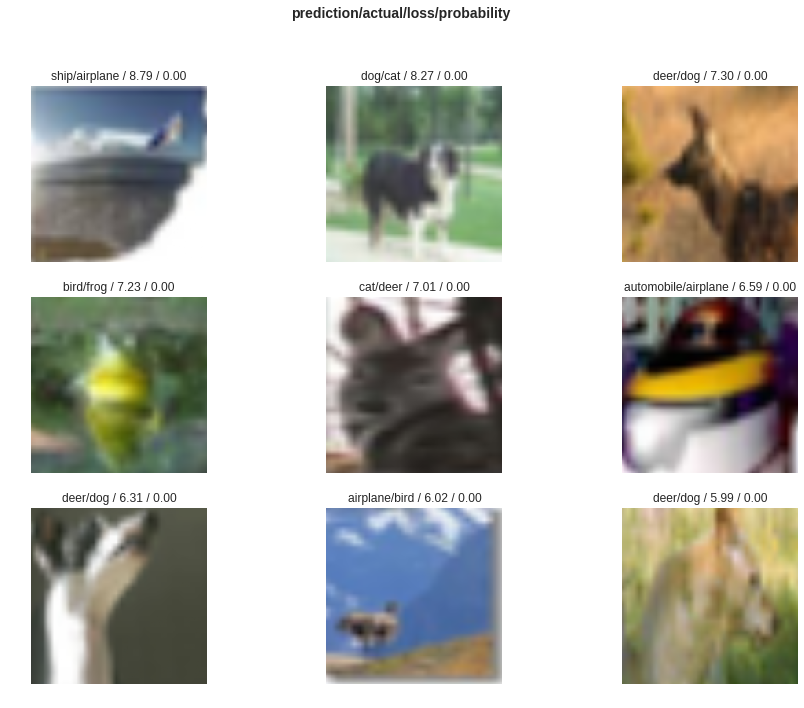

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

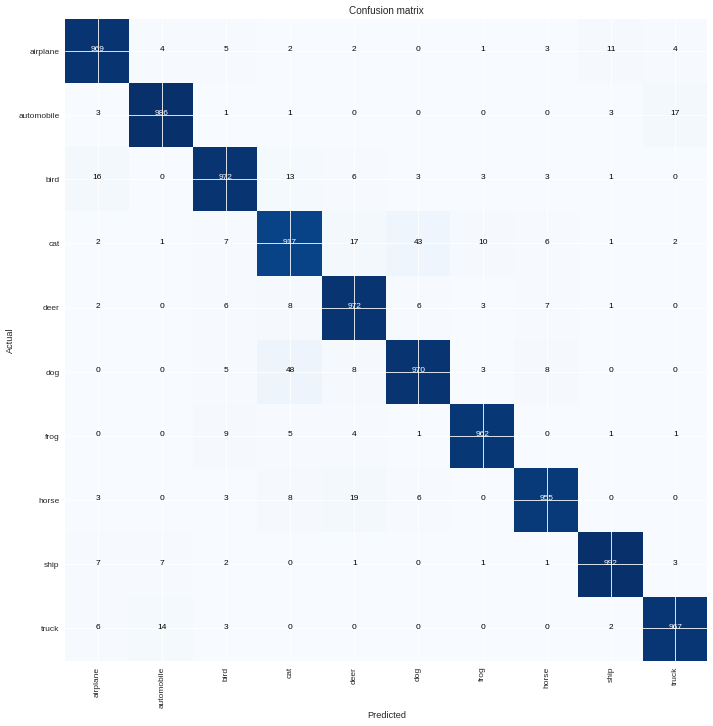

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interp.most_confused(min_val=2)

[('dog', 'cat', 48),
 ('cat', 'dog', 43),
 ('horse', 'deer', 19),
 ('automobile', 'truck', 17),
 ('cat', 'deer', 17),
 ('bird', 'airplane', 16),
 ('truck', 'automobile', 14),
 ('bird', 'cat', 13),
 ('airplane', 'ship', 11),
 ('cat', 'frog', 10),
 ('frog', 'bird', 9),
 ('deer', 'cat', 8),
 ('dog', 'deer', 8),
 ('dog', 'horse', 8),
 ('horse', 'cat', 8),
 ('cat', 'bird', 7),
 ('deer', 'horse', 7),
 ('ship', 'airplane', 7),
 ('ship', 'automobile', 7),
 ('bird', 'deer', 6),
 ('cat', 'horse', 6),
 ('deer', 'bird', 6),
 ('deer', 'dog', 6),
 ('horse', 'dog', 6),
 ('truck', 'airplane', 6),
 ('airplane', 'bird', 5),
 ('dog', 'bird', 5),
 ('frog', 'cat', 5),
 ('airplane', 'automobile', 4),
 ('airplane', 'truck', 4),
 ('frog', 'deer', 4),
 ('airplane', 'horse', 3),
 ('automobile', 'airplane', 3),
 ('automobile', 'ship', 3),
 ('bird', 'dog', 3),
 ('bird', 'frog', 3),
 ('bird', 'horse', 3),
 ('deer', 'frog', 3),
 ('dog', 'frog', 3),
 ('horse', 'airplane', 3),
 ('horse', 'bird', 3),
 ('ship', 'truck'

In [0]:
learn.unfreeze()

In [0]:
#using resnet34

#learn.fit_one_cycle(1)

Total time: 14:44
epoch  train_loss  valid_loss  error_rate
1      0.334468    0.219422    0.073300    (14:44)



In [26]:
learn.fit_one_cycle(1)

Total time: 19:29
epoch  train_loss  valid_loss  error_rate
1      0.359057    0.231563    0.076304    (19:29)



In [0]:
learn.load('stage-1')

In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


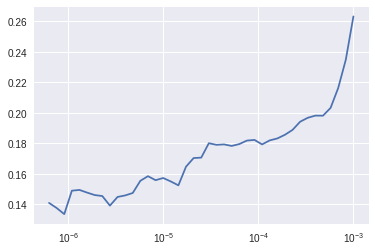

In [0]:
# using resnet34

# learn.recorder.plot()

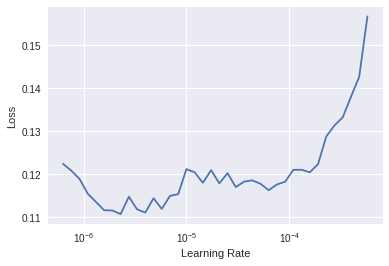

In [29]:
learn.recorder.plot()

In [0]:
# using resnet34

# learn.unfreeze()
# learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 29:38
epoch  train_loss  valid_loss  error_rate
1      0.165579    0.127615    0.043500    (14:50)
2      0.146759    0.119131    0.041000    (14:48)



In [30]:
#using resnet50

learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(5e-6,1e-4))

Total time: 38:48
epoch  train_loss  valid_loss  error_rate
1      0.142452    0.108623    0.037755    (19:25)
2      0.107502    0.096796    0.033184    (19:23)

